In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

569

In [6]:
cities

['hervey bay',
 'yellowknife',
 'nikolskoye',
 'punta arenas',
 'lompoc',
 'new norfolk',
 'taolanaro',
 'busselton',
 'salalah',
 'mutsamudu',
 'lyaskelya',
 'illoqqortoormiut',
 'ribeira grande',
 'bethel',
 'avera',
 'hobart',
 'atar',
 'borgarnes',
 'mecca',
 'vila velha',
 'hasaki',
 'vaini',
 'rikitea',
 'mataura',
 'anadyr',
 'ruda nad moravou',
 'sorrento',
 'fort nelson',
 'westport',
 'butaritari',
 'faya',
 'albany',
 'bredasdorp',
 'ambalavao',
 'nhulunbuy',
 'kapaa',
 'ushuaia',
 'puerto ayora',
 'lebu',
 'alyangula',
 'saskylakh',
 'cabo san lucas',
 'longyearbyen',
 'ilulissat',
 'castro',
 'cape town',
 'celestun',
 'victoria',
 'georgetown',
 'hilo',
 'dawei',
 'saint-philippe',
 'upernavik',
 'arraial do cabo',
 'port alfred',
 'atuona',
 'nguiu',
 'mar del plata',
 'vardo',
 'barrow',
 'waipawa',
 'tessalit',
 'lasa',
 'mys shmidta',
 'dikson',
 'cidreira',
 'ulaangom',
 'utiroa',
 'aras',
 'mahebourg',
 'fortuna',
 'sokolo',
 'natal',
 'pathein',
 'qaanaaq',
 'chuy'

In [7]:
# Import Dependencies
# Loop through dependencies
# Group cities in sets of 50 (we'll need two counters)
# Build the city url or endpoint for each city.
#Log the URL and the record  and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following: City, country date, lat, lon, max temp, hum, cloud, wind
# Add the data to a list in a dictionary format and then convert the list to a DF.


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
import pprint

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
#     print(city_url)
#     break

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
#         pprint.pprint(city_weather)
#         break
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hervey bay
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | salalah
Processing Record 10 of Set 1 | mutsamudu
City not found. Skipping...
Processing Record 11 of Set 1 | lyaskelya
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | atar
Processing Record 18 of Set 1 | borgarnes
Processing Record 19 of Set 1 | mecca
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set

Processing Record 40 of Set 4 | camargo
Processing Record 41 of Set 4 | sao felix do xingu
Processing Record 42 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | cassia
Processing Record 49 of Set 4 | san juan
Processing Record 50 of Set 4 | almeirim
Processing Record 1 of Set 5 | abeche
Processing Record 2 of Set 5 | lebyazhye
Processing Record 3 of Set 5 | santiago
Processing Record 4 of Set 5 | sinkat
City not found. Skipping...
Processing Record 5 of Set 5 | fez
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | dalbandin
Processing Record 8 of Set 5 | zhangye
Processing Record 9 of Set 5 | margate
Processing Record 10 of Set 5 | acarau
Processing Record 11 of Set 5 | norman wells
Processing Record 12

City not found. Skipping...
Processing Record 24 of Set 8 | spasskoye
Processing Record 25 of Set 8 | dingle
Processing Record 26 of Set 8 | khawhai
Processing Record 27 of Set 8 | iqaluit
Processing Record 28 of Set 8 | garango
Processing Record 29 of Set 8 | ayyampettai
Processing Record 30 of Set 8 | razole
Processing Record 31 of Set 8 | dinar
Processing Record 32 of Set 8 | osnabruck
Processing Record 33 of Set 8 | saint simons
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | ust-karsk
Processing Record 36 of Set 8 | versalles
Processing Record 37 of Set 8 | bam
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | ibra
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | chagda
City not found. Skipping...
Processing Record 42 of Set 8 | husavik
Processing Record 43 of Set 8 | juneau
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | barra patuca
Processing Record 46 of Set 8 | sidern

Processing Record 7 of Set 12 | yeniseysk
Processing Record 8 of Set 12 | culpeper
Processing Record 9 of Set 12 | makung
City not found. Skipping...
Processing Record 10 of Set 12 | metro
Processing Record 11 of Set 12 | paamiut
Processing Record 12 of Set 12 | catamarca
Processing Record 13 of Set 12 | chintamani
Processing Record 14 of Set 12 | cernosice
Processing Record 15 of Set 12 | tazovskiy
Processing Record 16 of Set 12 | yerbogachen
Processing Record 17 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 12 | khowst
Processing Record 19 of Set 12 | privolzhskiy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hervey Bay,-25.2986,152.8535,84.31,65,68,5.99,AU,2021-12-05 03:48:46
1,Yellowknife,62.4560,-114.3525,-25.08,75,75,5.75,CA,2021-12-05 03:48:47
2,Nikolskoye,59.7035,30.7861,10.02,93,87,6.40,RU,2021-12-05 03:48:47
3,Punta Arenas,-53.1500,-70.9167,48.31,57,75,10.36,CL,2021-12-05 03:45:05
4,Lompoc,34.6391,-120.4579,55.13,85,1,0.00,US,2021-12-05 03:48:47
5,New Norfolk,-42.7826,147.0587,73.65,31,1,5.01,AU,2021-12-05 03:48:48
6,Busselton,-33.6500,115.3333,86.09,31,45,10.45,AU,2021-12-05 03:46:44
7,Salalah,17.0151,54.0924,75.29,33,0,11.50,OM,2021-12-05 03:48:48
8,Lyaskelya,61.7667,31.0167,1.62,89,7,6.78,RU,2021-12-05 03:48:49
9,Ribeira Grande,38.5167,-28.7000,63.66,74,30,13.02,PT,2021-12-05 03:48:49


In [13]:
len(city_data)

512

In [14]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hervey Bay,AU,2021-12-05 03:48:46,-25.2986,152.8535,84.31,65,68,5.99
1,Yellowknife,CA,2021-12-05 03:48:47,62.4560,-114.3525,-25.08,75,75,5.75
2,Nikolskoye,RU,2021-12-05 03:48:47,59.7035,30.7861,10.02,93,87,6.40
3,Punta Arenas,CL,2021-12-05 03:45:05,-53.1500,-70.9167,48.31,57,75,10.36
4,Lompoc,US,2021-12-05 03:48:47,34.6391,-120.4579,55.13,85,1,0.00


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

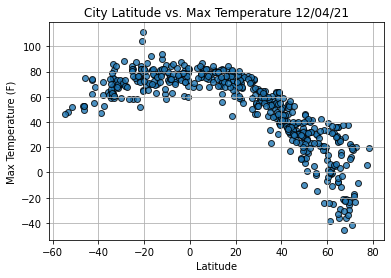

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

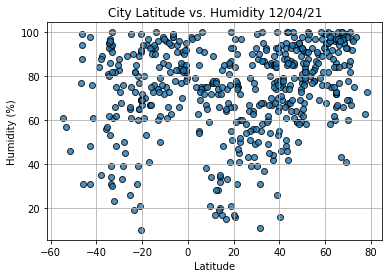

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

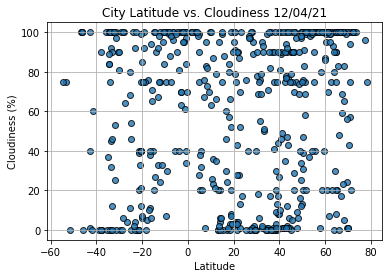

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

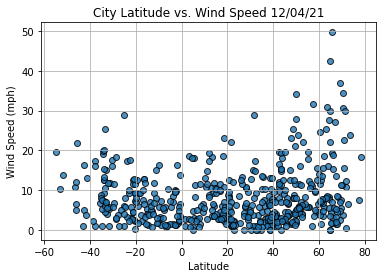

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig5.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                         Atar
Country                        MR
Date          2021-12-05 03:48:50
Lat                       20.5169
Lng                      -13.0499
Max Temp                    68.76
Humidity                       16
Cloudiness                     91
Wind Speed                   8.61
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-12-05 03:48:47,62.4560,-114.3525,-25.08,75,75,5.75
2,Nikolskoye,RU,2021-12-05 03:48:47,59.7035,30.7861,10.02,93,87,6.40
4,Lompoc,US,2021-12-05 03:48:47,34.6391,-120.4579,55.13,85,1,0.00
7,Salalah,OM,2021-12-05 03:48:48,17.0151,54.0924,75.29,33,0,11.50
8,Lyaskelya,RU,2021-12-05 03:48:49,61.7667,31.0167,1.62,89,7,6.78


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

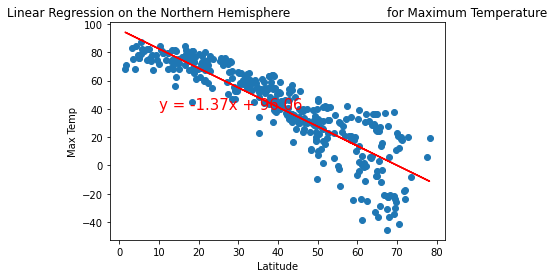

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

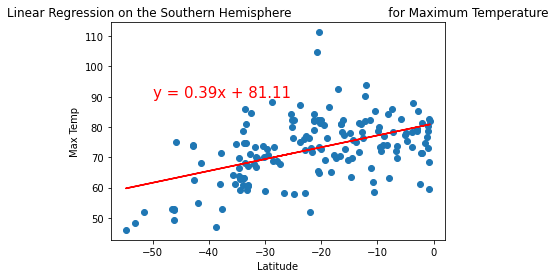

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

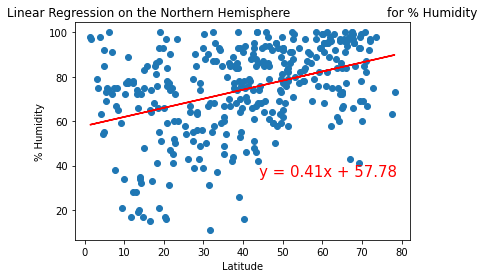

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(44,35))

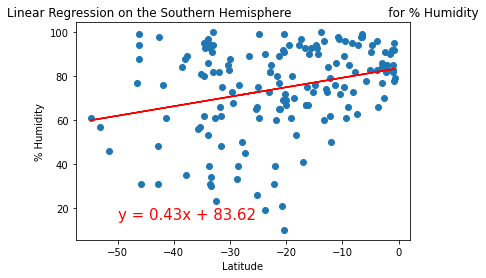

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

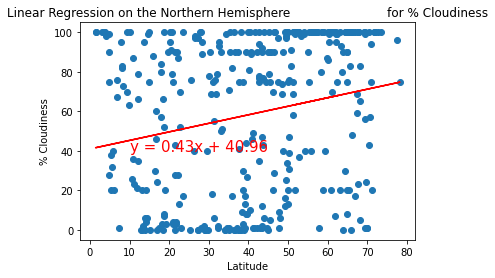

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (10,40))

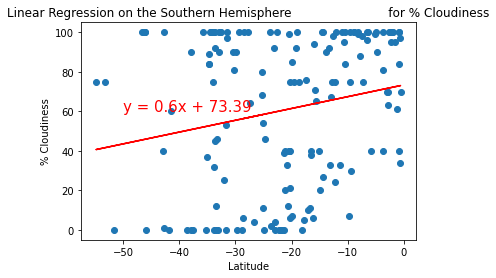

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

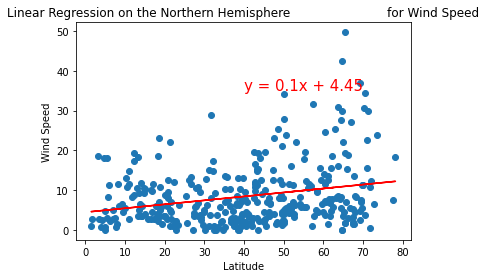

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

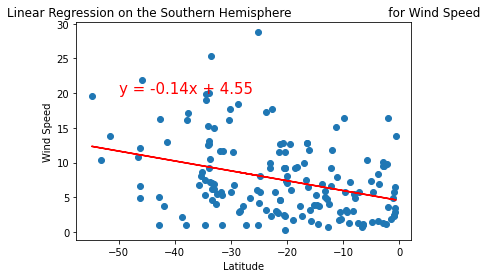

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))